In [45]:
assets_group = {'asserts': ['yfi', 'alcx', 'farm', 'auto', 'pickle', 'ren', 'badger'], 'cex_platform': ['bnb', 'okb', 'ftt', 'ht', 'leo', 'vgx', 'btmx', 'mdx', 'mx', 'woo'], 'DAO': ['dcr', 'ant', 'dafi'], 'derivative_synthesis': ['hegic', 'snx', 'uma', 'mir', 'lina'], 'dex': ['uni', 'cake', 'sushi', 'zrx', 'bnt', '1inch', 'crv', 'lrc', 'knc', 'bal', 'dodo', 'srm', 'rep', 'swap', 'perp', 'lon', 'any', 'kex'], 'insurance': ['nxm', 'wnxm', 'helmet', 'armor', 'yam'], 'lending': ['aave', 'comp', 'mkr', 'xvs', 'alpha', 'kava', 'mft', 'cream', 'uft', 'cel'], 'NFT': ['chz', 'enj', 'mana', 'flow', 'sand', 'ern', 'alice', 'rari', 'matic', 'waxp', 'tvk', 'cws', 'axs'], 'oracle': ['link', 'band', 'api3', 'trb', 'nest'], 'stablecoin': ['luna', 'rsr', 'ampl', 'esd', 'fxs', 'bank', 'bas', 'bac'], 'public_chain': ['btc', 'eth', 'ada', 'vet', 'miota', 'xtz', 'neo', 'algo', 'hbar', 'stx', 'near', 'icx', 'ont', 'qtum', 'one', 'iost', 'ckb', 'stmx', 'vtho', 'ewt', 'orbs', 'lyxe', 'chr', 'lsk', 'waves', 'zil', 'atom', 'sol', 'AVAX', 'egld', 'qkc', 'xem', 'ftm'], 'storage': ['fil', 'ar', 'storj', 'sc', 'cru'], 'payment': ['cro', 'omg', 'npxs', 'nano', 'sxp', 'utk', 'coti', 'pac', 'tel', 'meta', 'nim', 'xlm'],  'data': ['dent', 'nmr', 'bdp', 'ocean', 'btt', 'grt'], 'dot': ['ksm', 'pols', 'fis', 'reef', 'edg', 'dot', 'ring'], 'privacy': ['xmr', 'dash', 'zec', 'xvg', 'rose', 'torn']}

In [46]:
from datetime import datetime, timedelta
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import numpy as np
import pandas as pd
import seaborn as sns
import json
import time

data_source_option = {"open":1,"high":2,"low":3,"close":4,"volume":5}

### User input ### 
DATA_SOURCE = "close" # default by closing price. Could change to 'volume' to get the volume heapmap
MOVING_AVERAGE = 5

## error while fetching 'flow' data
#assets_group = {'btc': ['btc'], 'nft':['theta', 'mana', 'flow'], 'exchange':['bnb', 'okb', 'ht']}

start_date = '2021-01-01'
end_date ='2021-04-12'
# assets_group = {'btc': ['btc'], 'eth': ['eth'], 'nft':['theta', 'mana'], 'exchange':['bnb', 'okb', 'ht']}

# file_name = "coin.txt"
# assets_group = {}

# with open(file_name, 'r') as f:
#   line = f.readline()
#   while line != '':
#     line = line.rstrip('\n').split('\t')
#     assets_group.setdefault(line[1], [])
#     assets_group[line[1]].append(line[0])
#     line = f.readline()

price_24h_change_all = []
index = []

url = 'https://data.messari.io/api/v1/assets/{assetKey}/metrics/price/time-series'
parameters = {
  'start':start_date,
  'end':end_date,
  'interval':'1d'
}
headers = {
  'Accepts': 'application/json',
}

session = Session()
session.headers.update(headers)

## subtract 1 day to make the index consistent for different libraries
start_date_delta = (datetime.strptime(start_date, '%Y-%m-%d') - timedelta(days=1)).date()
end_date_delta = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).date()

days = pd.date_range(start_date_delta, end_date_delta, freq='D') 

df = pd.DataFrame(days, columns=['Date'])
df['Date'] = df['Date'].dt.date
df = df.set_index('Date', drop=True)

for key, assets in assets_group.items():
  for asset in assets:
    try:
      response = session.get(url.format(assetKey=asset), params=parameters)

      if response.status_code != 200:
          print('%d: %s' % (response.status_code, asset))
          continue

      time.sleep(4)
      makey = asset + ' ma' + str(MOVING_AVERAGE) 
      historical_price_json = json.loads(response.text)

      historical_price = historical_price_json['data']['values']

      if not historical_price or len(historical_price) != 102:
          print('short %s' % asset)
          continue

      print('yes %s' % asset)
      volumn_close_dic = {str(datetime.fromtimestamp(price[0]/1e3).date()): price[data_source_option[DATA_SOURCE]] for price in historical_price}

      df[asset] = pd.Series(volumn_close_dic).values   
      df[makey] =  df[asset].rolling(window=MOVING_AVERAGE).mean()
                  
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)          

yes yfi
short alcx
yes farm
short auto
short pickle
yes ren
yes badger
yes bnb
yes okb
yes ftt
yes ht
yes leo
short vgx
404: btmx
short mdx
404: mx
404: woo
yes dcr
yes ant
404: dafi
yes hegic
yes snx
yes uma
yes mir
short lina
yes uni
short cake
yes sushi
yes zrx
yes bnt
yes 1inch
yes crv
yes lrc
yes knc
yes bal
short dodo
yes srm
yes rep
short swap
yes perp
short lon
404: any
short kex
short nxm
yes wnxm
404: helmet
short armor
short yam
yes aave
yes comp
yes mkr
yes xvs
yes alpha
yes kava
yes mft
yes cream
yes uft
yes cel
yes chz
yes enj
yes mana
short flow
yes sand
404: ern
short alice
yes rari
yes matic
yes waxp
short tvk
short cws
yes axs
yes link
yes band
yes api3
yes trb
yes nest
yes luna
yes rsr
yes ampl
yes esd
short fxs
short bank
short bas
short bac
yes btc
yes eth
yes ada
yes vet
yes miota
yes xtz
yes neo
yes algo
yes hbar
yes stx
yes near
yes icx
yes ont
yes qtum
yes one
yes iost
yes ckb
yes stmx
yes vtho
short ewt
yes orbs
404: lyxe
yes chr
yes lsk
yes waves
yes zil
yes 

In [47]:
df.to_csv('price_history.csv')

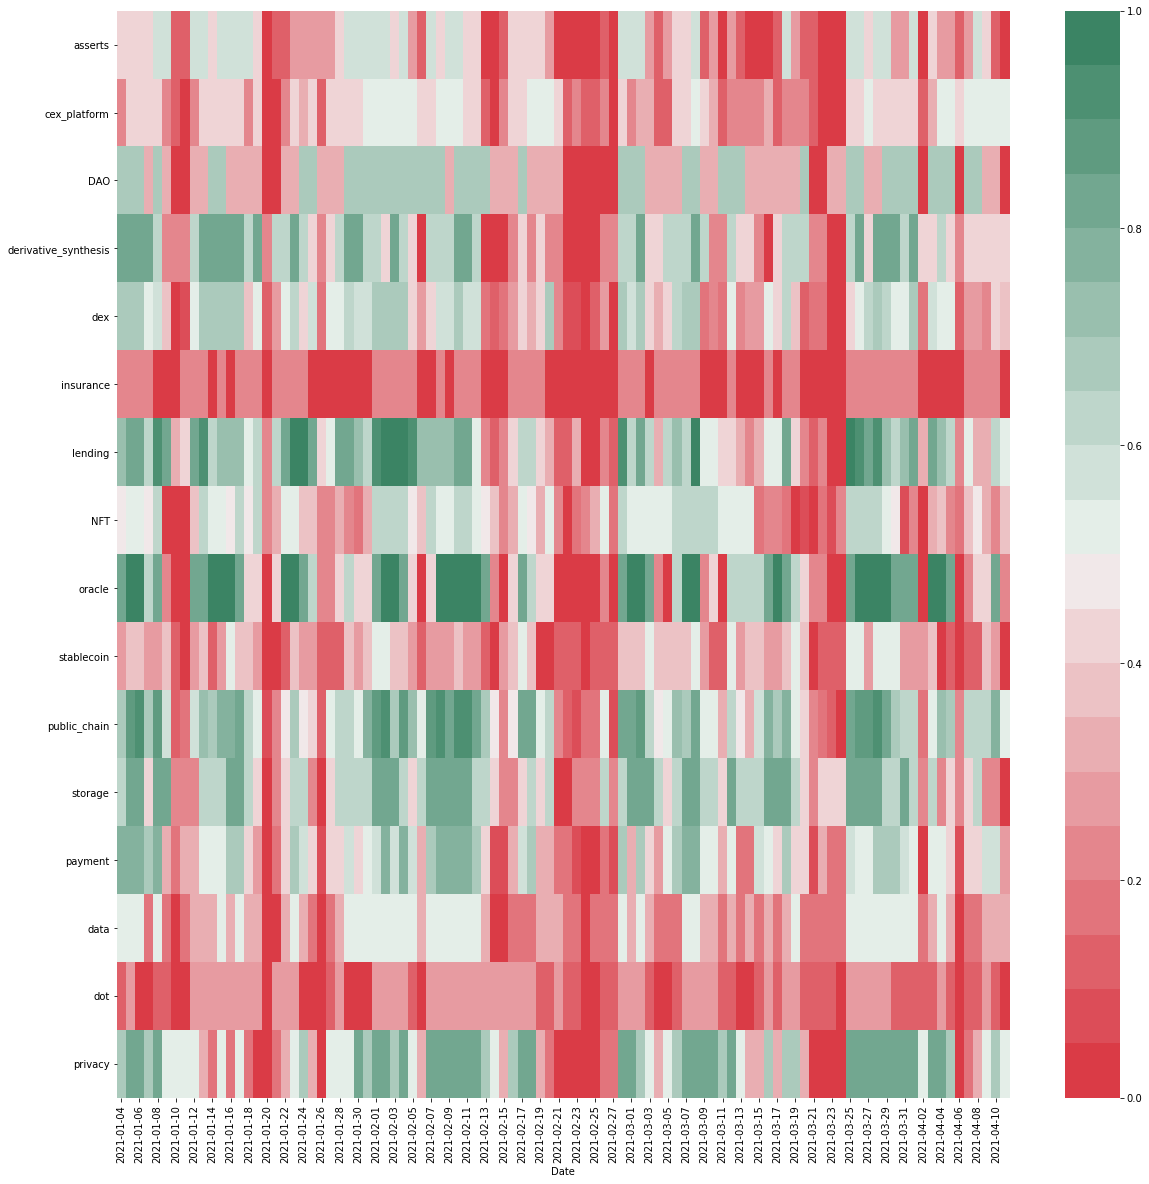

In [48]:
# drop first 4 days, as NaN values for first 4 days if calcualge ma5
df = df.dropna()    
   
## Calculate if each individual coin above ma5, and total # of coins above ma5 in each group (e.g. nft group) 
for key, assets in assets_group.items():
    col_total_above = key + ' total above ma' + str(MOVING_AVERAGE)
    df[col_total_above] = 0
    for asset in assets:
        if not asset in df:
            continue
        makey = asset + ' ma' + str(MOVING_AVERAGE)
        ma5Comparekey = asset + ' above ma' + str(MOVING_AVERAGE)      
        df[ma5Comparekey] = np.where(df[asset] > df[makey], 1, 0)
        df[col_total_above] += df[ma5Comparekey]

## Calculate percentage of coins above ma5 in each group         
for key, assets in assets_group.items():
    percentage_above = key + ' percentage above ma' + str(MOVING_AVERAGE)
    col_total_above = key + ' total above ma' + str(MOVING_AVERAGE)
    df[percentage_above] = df[col_total_above] / len(assets)

## Reorder column for better viewing
ordered_col = []
key_col = []
keys = []
for key, assets in assets_group.items():
    for asset in assets:
        if not asset in df:
            continue
        makey = asset + ' ma' + str(MOVING_AVERAGE)
        ma5Comparekey = asset + ' above ma' + str(MOVING_AVERAGE)
        ordered_col.append(asset)
        ordered_col.append(makey)
        ordered_col.append(ma5Comparekey)
    col_total_above = key + ' total above ma' + str(MOVING_AVERAGE)
    percentage_above = key + ' percentage above ma' + str(MOVING_AVERAGE)
    ordered_col.append(col_total_above)
    ordered_col.append(percentage_above)
    key_col.append(percentage_above)
    keys.append(key)
    
df = df[ordered_col] 

##Complete data frame

model_df = df[key_col]
model_df.columns = keys

# model_df.index = model_df.index.strftime("%m/%d/%y")

model_df = model_df.T

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['MOESongUN']
plt.rcParams['font.serif'] = ['MOESongUN']
plt.rcParams['axes.unicode_minus'] = False

colormap = sns.diverging_palette(10, 150, n=20) # sns.color_palette("Greens")

fig, ax = plt.subplots(figsize=(20,20))  

p1 = sns.heatmap(model_df, cmap=colormap, ax=ax)